In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 전처리

## 압축 풀기

### train

In [ ]:
import os
import zipfile

def extract_zip_files(source_folder, destination_folder):
	  # 소스 폴더 내의 모든 파일과 폴더를 가져옵니다.
	  file_list = os.listdir(source_folder)

	  # 소스 폴더 내의 각 파일에 대해 작업을 수행합니다.
	  for file_name in file_list:
	      file_path = os.path.join(source_folder, file_name)

	      # 파일이 압축 파일인지 확인합니다.
	      if zipfile.is_zipfile(file_path):
	          # 압축 파일을 엽니다.
	          with zipfile.ZipFile(file_path, 'r') as zip_ref:
	              # 압축 해제할 경로를 만듭니다.
	              extraction_path = os.path.join(destination_folder, file_name[:-4])
	              os.makedirs(extraction_path, exist_ok=True)
	              # 압축을 해제합니다.
	              zip_ref.extractall(extraction_path)
	              print(f'{file_name} 압축 해제 완료')
	      else:
	          print(f'{file_name}은(는) 압축 파일이 아닙니다.')

# 압축 파일들이 있는 폴더와 압축 해제한 파일들을 저장할 폴더를 지정합니다.
source_folder = '/content/drive/MyDrive/258.지자체 도로부속시설물 파손 데이터/data/Validation/sourcedata'
destination_folder = '/content/drive/MyDrive/My_Data/train/img'

# 함수를 호출하여 압축 파일들을 해제합니다.
extract_zip_files(source_folder, destination_folder)

VS_PM_PM_sedan_2.zip 압축 해제 완료
VS_PM_PM_truck_2.zip 압축 해제 완료
VS_AM_AM_sedan_1.zip 압축 해제 완료
VS_AM_AM_truck_1.zip 압축 해제 완료
VS_PM_PM_sedan_1.zip 압축 해제 완료
VS_PM_PM_truck_1.zip 압축 해제 완료


### val

In [ ]:
import os
import zipfile

def extract_zip_files(source_folder, destination_folder):
	  # 소스 폴더 내의 모든 파일과 폴더를 가져옵니다.
	  file_list = os.listdir(source_folder)

	  # 소스 폴더 내의 각 파일에 대해 작업을 수행합니다.
	  for file_name in file_list:
	      file_path = os.path.join(source_folder, file_name)

	      # 파일이 압축 파일인지 확인합니다.
	      if zipfile.is_zipfile(file_path):
	          # 압축 파일을 엽니다.
	          with zipfile.ZipFile(file_path, 'r') as zip_ref:
	  # train_images            # 압축 해제할 경로를 만듭니다.
	              extraction_path = os.path.join(destination_folder, file_name[:-4])
	              os.makedirs(extraction_path, exist_ok=True)
	              # 압축을 해제합니다.
	              zip_ref.extractall(extraction_path)
	              print(f'{file_name} 압축 해제 완료')
	      else:
	          print(f'{file_name}은(는) 압축 파일이 아닙니다.')

# 압축 파일들이 있는 폴더와 압축 해제한 파일들을 저장할 폴더를 지정합니다.
source_folder = '/content/drive/MyDrive/258.지자체 도로부속시설물 파손 데이터/data/Validation/labelingdata'
destination_folder = '/content/drive/MyDrive/My_Data/train/lab'

# 함수를 호출하여 압축 파일들을 해제합니다.
extract_zip_files(source_folder, destination_folder)

VL_PM_PM_truck_2.zip 압축 해제 완료
VL_PM_PM_sedan_2.zip 압축 해제 완료
VL_AM_AM_truck_1.zip 압축 해제 완료
VL_AM_AM_sedan_1.zip 압축 해제 완료
VL_PM_PM_truck_1.zip 압축 해제 완료
VL_PM_PM_sedan_1.zip 압축 해제 완료


## 폴더 병합

### train

In [ ]:
import os
import shutil

def merge_image_folders(source_folder, destination_folder):
    os.makedirs(destination_folder, exist_ok=True)

    # 하위 폴더 목록 가져오기
    subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]

    for folder in subfolders:
        # 폴더 내의 이미지 파일 목록 가져오기
        image_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

        for image_file in image_files:
            # 이미지 파일 경로
            image_path = os.path.join(folder, image_file)

            # 이미지 파일을 목적 폴더로 이동
            shutil.move(image_path, destination_folder)

            print(f"Moved {image_file} to {destination_folder}.")

# 경로 설정
source_folder = '/content/drive/MyDrive/My_Data/train/img'  # 이미지 파일이 있는 원본 폴더 경로
destination_folder = '/content/drive/MyDrive/My_Data/train/image'  # 병합된 이미지 파일을 저장할 폴더 경로

# 이미지 파일 병합 실행
merge_image_folders(source_folder, destination_folder)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved real_sunny_PM_20220907_161753_truck_Ulsan-si_01039.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220908_125338_truck_Seo-gu_05419.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220908_120035_truck_Gangseo-gu_19344.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220908_120035_truck_Gangseo-gu_06356.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220907_161753_truck_Ulsan-si_01021.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220908_125823_truck_Gijang-gun_00239.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220908_120035_truck_Gangseo-gu_19393.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220907_161753_truck_Ulsan-si_01206.jpg to /content/drive/MyDrive/My_Data/train/image.
Moved real_sunny_PM_20220907_161753_truck_Ulsan-si_01133.jpg to /content/drive/MyDrive/My_Data

In [ ]:
len(os.listdir('/content/drive/MyDrive/My_Data/train/image'))

42261

### val

In [ ]:
import os
import shutil

def merge_json_folders(source_folder, destination_folder):
    os.makedirs(destination_folder, exist_ok=True)

    # 하위 폴더 목록 가져오기
    subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]

    for folder in subfolders:
        # 폴더 내의 JSON 파일 목록 가져오기
        json_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.endswith('.json')]

        for json_file in json_files:
            # JSON 파일 경로
            json_path = os.path.join(folder, json_file)

            # JSON 파일을 목적 폴더로 이동
            shutil.move(json_path, destination_folder)

            print(f"Moved {json_file} to {destination_folder}.")

# 경로 설정
source_folder = '/content/drive/MyDrive/My_Data/train/lab'  # JSON 파일이 있는 원본 폴더 경로
destination_folder = '/content/drive/MyDrive/My_Data/train/label'  # 병합된 JSON 파일을 저장할 폴더 경로

# JSON 파일 병합 실행
merge_json_folders(source_folder, destination_folder)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved real_sunny_PM_20220919_144941_sedan_Ulsan-si_00840.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220916_154321_sedan_Yeongdo-gu_05477.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220916_150326_sedan_Suyeong-gu_00075.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220916_154321_sedan_Yeongdo-gu_05388.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220916_154321_sedan_Yeongdo-gu_03185.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220916_144941_sedan_Ulsan-si_11829.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220916_144941_sedan_Ulsan-si_11867.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220916_144941_sedan_Ulsan-si_11840.json to /content/drive/MyDrive/My_Data/train/label.
Moved real_sunny_PM_20220919_130235_sedan_Nam-gu_03771.json to /content/drive/MyDriv

In [ ]:
len(os.listdir('/content/drive/MyDrive/My_Data/train/label'))

42261

In [ ]:
import os

# 이미지 폴더와 레이블 폴더의 경로
image_folder = "/content/drive/MyDrive/My_Data/train/image"
label_folder = "/content/drive/MyDrive/My_Data/train/label"

# 이미지 폴더와 레이블 폴더 내부의 파일 목록 가져오기
image_files = sorted(os.listdir(image_folder))
label_files = sorted(os.listdir(label_folder))

# 파일 이름을 비교하고 다른 경우 출력하기
count_different_files = 0  # 다른 파일의 수를 세기 위한 변수 초기화

for image_file, label_file in zip(image_files, label_files):
    image_name, image_ext = os.path.splitext(image_file)
    label_name, label_ext = os.path.splitext(label_file)
    if image_name != label_name:
        print(f"파일 이름이 다릅니다: {image_file}, {label_file}")
        count_different_files += 1

print(f"전체 다른 파일의 수: {count_different_files}")

전체 다른 파일의 수: 0


## 라벨링 데이터 YOLO 형식으로 변환

In [ ]:
import os
import json

# 변환할 폴더 경로
folder_path = '/content/drive/MyDrive/My_Data/train/label'

# 변환할 클래스 목록
class_names = [
    "PE드럼 정상",
    "PE드럼 파손",
    "PE방호벽 정상",
    "PE방호벽 파손",
    "PE안내봉 정상",
    "PE안내봉 파손",
    "라바콘 정상",
    "라바콘 파손",
    "시선유도봉 정상",
    "시선유도봉 파손",
    "제설함 정상",
    "제설함 파손",
    "PE입간판 정상",
    "PE입간판 파손",
    "PE휀스 정상",
    "PE휀스 파손"
]
# 변환 함수
def convert_to_yolo(json_path, class_names, image_width, image_height):
    with open(json_path, 'r') as f:
        data = json.load(f)

    yolo_lines = []
    for annotation in data['annotations']:
        category_id = annotation['category_id']
        if category_id <= 0 or category_id > len(class_names):
            continue

        class_id = category_id - 1
        class_name = class_names[class_id]

        bbox = annotation['bbox']
        x_center = (bbox[0] + bbox[2] / 2) / image_width
        y_center = (bbox[1] + bbox[3] / 2) / image_height
        width = bbox[2] / image_width
        height = bbox[3] / image_height

        yolo_line = f"{class_id} {x_center} {y_center} {width} {height}"
        yolo_lines.append(yolo_line)

    yolo_text = "\n".join(yolo_lines)
    return yolo_text

# 이미지의 너비와 높이
image_width = 1920
image_height = 1080

# 폴더 내의 파일들 처리
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    if file_name.endswith('.json'):
        yolo_text = convert_to_yolo(file_path, class_names, image_width, image_height)

        yolo_file_path = os.path.splitext(file_path)[0] + '.txt'
        with open(yolo_file_path, 'w') as f:
            f.write(yolo_text)

        os.remove(file_path)  # 원본 JSON 파일 삭제

print('YOLO 변환 및 원본 JSON 파일 삭제 완료.')

YOLO 변환 및 원본 JSON 파일 삭제 완료.


In [ ]:
len(os.listdir('/content/drive/MyDrive/My_Data/train/label'))

42261

In [ ]:
import os

# 이미지 폴더와 레이블 폴더의 경로
image_folder = "/content/drive/MyDrive/My_Data/train/image"
label_folder = "/content/drive/MyDrive/My_Data/train/label"

# 이미지 폴더와 레이블 폴더 내부의 파일 목록 가져오기
image_files = sorted(os.listdir(image_folder))
label_files = sorted(os.listdir(label_folder))

# 파일 이름을 비교하고 다른 경우 출력하기
count_different_files = 0  # 다른 파일의 수를 세기 위한 변수 초기화

for image_file, label_file in zip(image_files, label_files):
    image_name, image_ext = os.path.splitext(image_file)
    label_name, label_ext = os.path.splitext(label_file)
    if image_name != label_name:
        print(f"파일 이름이 다릅니다: {image_file}, {label_file}")
        count_different_files += 1

print(f"전체 다른 파일의 수: {count_different_files}")

전체 다른 파일의 수: 0


In [ ]:
import os

# YOLO 형식의 텍스트 파일이 있는 디렉토리 경로
txt_dir = "/content/drive/MyDrive/My_Data/train/label"

# 클래스별 개수를 저장할 딕셔너리 생성
class_counts = {}

# YOLO 형식의 텍스트 파일들을 순회하면서 클래스별 개수 세기
for txt_file in os.listdir(txt_dir):
    with open(os.path.join(txt_dir, txt_file), 'r') as file:
        for line in file:
            class_id = line.split()[0]
            if class_id in class_counts:
                class_counts[class_id] += 1
            else:
                class_counts[class_id] = 1

# 클래스별 개수 출력
for class_id, count in class_counts.items():
    print(f"클래스 {class_id}: {count}개")

클래스 4: 4890개
클래스 5: 3249개
클래스 2: 5577개
클래스 3: 3147개
클래스 6: 6108개
클래스 10: 3005개
클래스 0: 3137개
클래스 11: 5037개
클래스 8: 7042개
클래스 7: 5862개
클래스 1: 4065개
클래스 12: 4206개
클래스 9: 4035개
클래스 14: 2637개
클래스 15: 2586개
클래스 13: 5493개


## train / val split (class 비중 어느정도 맞춰서)

In [ ]:
import os
import random
import shutil

# 전체 이미지와 레이블 데이터셋의 디렉토리 경로
images_dir = "/content/drive/MyDrive/My_Data/train/image"
labels_dir = "/content/drive/MyDrive/My_Data/train/label"

# 새로운 작은 데이터셋의 디렉토리 경로
new_images_dir = "/content/drive/MyDrive/My_Data/train/images"
new_labels_dir = "/content/drive/MyDrive/My_Data/train/labels"
val_images_dir = "/content/drive/MyDrive/My_Data/val/images"
val_labels_dir = "/content/drive/MyDrive/My_Data/val/labels"

# 클래스별로 유지할 최대 개수
max_class_count = 4800 // 16  # 전체 개수를 클래스 개수로 나누어 줄이고자 하는 개수 계산

# 클래스별 개수를 저장할 딕셔너리 생성
class_counts = {}

# 전체 레이블 데이터셋 순회하면서 클래스별 개수 세기
for label_file in os.listdir(labels_dir):
    with open(os.path.join(labels_dir, label_file), 'r') as file:
        for line in file:
            class_id = line.split()[0]
            if class_id in class_counts:
                class_counts[class_id] += 1
            else:
                class_counts[class_id] = 1

# 클래스별로 작은 데이터셋에 추가할 이미지와 레이블 선택
selected_files = []
for class_id, count in class_counts.items():
    if count > max_class_count:
        # 클래스별로 최대 개수만큼 이미지를 랜덤하게 선택
        class_files = random.sample(os.listdir(images_dir), max_class_count)
    else:
        # 클래스별 이미지 개수가 최대 개수보다 작으면 모든 이미지 선택
        class_files = os.listdir(images_dir)

    # 선택된 파일 목록에 추가
    selected_files.extend(class_files)

# 선택된 이미지와 레이블 파일을 새로운 작은 데이터셋 폴더로 복사
for file_name in selected_files:
    image_path = os.path.join(images_dir, file_name)
    label_path = os.path.join(labels_dir, os.path.splitext(file_name)[0] + ".txt")

    # 이미지와 레이블 파일을 train 또는 val 폴더에 분할하여 복사
    if random.random() < 0.8:  # 80%의 확률로 train 폴더에 저장
        shutil.copy(image_path, new_images_dir)
        shutil.copy(label_path, new_labels_dir)
    else:  # 20%의 확률로 val 폴더에 저장
        shutil.copy(image_path, val_images_dir)
        shutil.copy(label_path, val_labels_dir)

In [ ]:
len(os.listdir('/content/drive/MyDrive/My_Data/train/images'))

3689

In [ ]:
len(os.listdir('/content/drive/MyDrive/My_Data/val/images'))

944

In [ ]:
import os

# 이미지 폴더와 레이블 폴더의 경로
image_folder = "/content/drive/MyDrive/My_Data/train/images"
label_folder = "/content/drive/MyDrive/My_Data/train/labels"

# 이미지 폴더와 레이블 폴더 내부의 파일 목록 가져오기
image_files = sorted(os.listdir(image_folder))
label_files = sorted(os.listdir(label_folder))

# 파일 이름을 비교하고 다른 경우 출력하기
count_different_files = 0  # 다른 파일의 수를 세기 위한 변수 초기화

for image_file, label_file in zip(image_files, label_files):
    image_name, image_ext = os.path.splitext(image_file)
    label_name, label_ext = os.path.splitext(label_file)
    if image_name != label_name:
        print(f"파일 이름이 다릅니다: {image_file}, {label_file}")
        count_different_files += 1

print(f"전체 다른 파일의 수: {count_different_files}")

전체 다른 파일의 수: 0


In [ ]:
import os

# 이미지 폴더와 레이블 폴더의 경로
image_folder = "/content/drive/MyDrive/My_Data/val/images"
label_folder = "/content/drive/MyDrive/My_Data/val/labels"

# 이미지 폴더와 레이블 폴더 내부의 파일 목록 가져오기
image_files = sorted(os.listdir(image_folder))
label_files = sorted(os.listdir(label_folder))

# 파일 이름을 비교하고 다른 경우 출력하기
count_different_files = 0  # 다른 파일의 수를 세기 위한 변수 초기화

for image_file, label_file in zip(image_files, label_files):
    image_name, image_ext = os.path.splitext(image_file)
    label_name, label_ext = os.path.splitext(label_file)
    if image_name != label_name:
        print(f"파일 이름이 다릅니다: {image_file}, {label_file}")
        count_different_files += 1

print(f"전체 다른 파일의 수: {count_different_files}")

전체 다른 파일의 수: 0


In [ ]:
import os

# YOLO 형식의 텍스트 파일이 있는 디렉토리 경로
txt_dir = "/content/drive/MyDrive/My_Data/train/labels"

# 클래스별 개수를 저장할 딕셔너리 생성
class_counts = {}

# YOLO 형식의 텍스트 파일들을 순회하면서 클래스별 개수 세기
for txt_file in os.listdir(txt_dir):
    with open(os.path.join(txt_dir, txt_file), 'r') as file:
        for line in file:
            class_id = line.split()[0]
            if class_id in class_counts:
                class_counts[class_id] += 1
            else:
                class_counts[class_id] = 1

# 클래스별 개수 출력
for class_id, count in class_counts.items():
    print(f"클래스 {class_id}: {count}개")

클래스 6: 561개
클래스 11: 437개
클래스 3: 260개
클래스 7: 482개
클래스 13: 476개
클래스 10: 306개
클래스 15: 222개
클래스 9: 387개
클래스 2: 499개
클래스 4: 414개
클래스 12: 361개
클래스 5: 276개
클래스 14: 222개
클래스 0: 342개
클래스 8: 500개
클래스 1: 342개


In [ ]:
import os

# YOLO 형식의 텍스트 파일이 있는 디렉토리 경로
txt_dir = "/content/drive/MyDrive/My_Data/val/labels"

# 클래스별 개수를 저장할 딕셔너리 생성
class_counts = {}

# YOLO 형식의 텍스트 파일들을 순회하면서 클래스별 개수 세기
for txt_file in os.listdir(txt_dir):
    with open(os.path.join(txt_dir, txt_file), 'r') as file:
        for line in file:
            class_id = line.split()[0]
            if class_id in class_counts:
                class_counts[class_id] += 1
            else:
                class_counts[class_id] = 1

# 클래스별 개수 출력
for class_id, count in class_counts.items():
    print(f"클래스 {class_id}: {count}개")

클래스 12: 93개
클래스 1: 97개
클래스 10: 68개
클래스 4: 120개
클래스 13: 111개
클래스 14: 64개
클래스 11: 125개
클래스 6: 134개
클래스 7: 150개
클래스 9: 66개
클래스 3: 74개
클래스 2: 121개
클래스 15: 50개
클래스 5: 77개
클래스 8: 107개
클래스 0: 64개


## 학습 전 수행 코드

In [17]:
%cd /content/drive/MyDrive/yolov5-master

/content/drive/MyDrive/yolov5-master


In [18]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [19]:
!pip install -r requirements.txt

## 학습

### 10epochs

In [ ]:
!python train.py --data /content/drive/MyDrive/yolov5-master/custom_data.yaml --epochs 10 --batch 16

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolov5-master/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-7-2 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_

### 25epochs

In [ ]:
!python train.py --data /content/drive/MyDrive/yolov5-master/custom_data.yaml --epochs 25 --batch 16

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolov5-master/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-7-2 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_

## 검출

### 이미지

In [10]:
!python detect.py --weights /content/drive/MyDrive/best_weights.pt --source /content/drive/MyDrive/test_04.jpg

detect: weights=['/content/drive/MyDrive/best_weights.pt'], source=/content/drive/MyDrive/test_04.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-7-2 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/test_04.jpg: 384x640 17 시선유도봉 정상s, 44.3ms
Speed: 0.5ms pre-process, 44.3ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


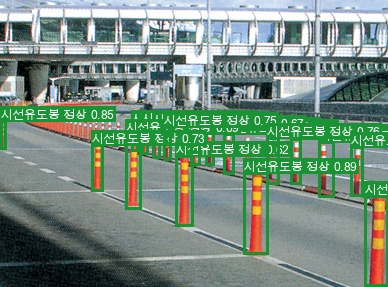

In [13]:
from IPython.display import Image, display
display(Image(filename = '/content/drive/MyDrive/yolov5-master/runs/detect/exp/test_01.jpg'))

### 동영상

In [20]:
# 영상
!python detect.py --weights /content/drive/MyDrive/best_weights.pt --source /content/drive/MyDrive/test_05.mp4

detect: weights=['/content/drive/MyDrive/best_weights.pt'], source=/content/drive/MyDrive/test_04.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-7-2 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
video 1/1 (1/129) /content/drive/MyDrive/test_04.mp4: 384x640 2 PE안내봉 파손s, 1 PE휀스 정상, 47.2ms
video 1/1 (2/129) /content/drive/MyDrive/test_04.mp4: 384x640 2 PE안내봉 파손s, 1 PE휀스 정상, 8.0ms
video 1/1 (3/129) /content/drive/MyDrive/test_04.mp4: 384x640 2 PE안내봉 파손s, 1 PE휀스 정상, 8.0ms
video 1/1 (4/129) /content/drive/MyDrive/test_04.mp4: 3